# NOU-er

For å undersøke en liste NOU-er. Listen består av ca 1300 NOU-rapporter.

Starter med å importere nødvendige moduler

In [1]:
import dhlab.nbtext as nb
import dhlab.module_update as mu
mu.update('collocations', overwrite=True)
import collocations as col
import dhlab.graph_networkx_louvain as gnl
from random import sample
mu.css()

Updated file `C:\Users\larsj\Documents\GitHub\Miscellaneous-Notebooks\newspaper_conc_coll\collocations.py`

## NOU

De har en egen liste med URN-er. Filen må ligge i samme mappe som notebooken.

In [2]:
NOU = nb.pure_urn(open('nou_urn.txt').read())

In [3]:
len(NOU)

1384

In [4]:
nb.frame(nb.metadata(NOU), "urn forfatter år tittel subtittel forlag x x lang trans".split())

,urn,forfatter,år,tittel,subtittel,forlag,x,x,lang,trans
0,2011061406050,,1979,Sjømannsskatt for mannskap på utenlandske skip,delutredning 1 fra utvalget til vurdering av s...,Universitetsforlaget,notfiction,dfe5e8a57cc6aa276de58c2bcc6052c8,nob,
1,2013080806034,,1981,Samordning av minstelottsordningen og arbeidsl...,,Universitetsforlaget,notfiction,6e3e8a2eaa1cb4ff66d1eee1c1094255,nob,
2,2011092208093,,2008,Barn og straff,utviklingsstøtte og kontroll : utredning fra u...,"Departementenes servicesenter, Informasjonsfor...",notfiction,650c7b26c0d989c7c3786dda6285e544,nob,
3,2011061406083,,1979,Om utbyggingen av lønns- og inntektsstatistikken,"rapport nr. 1, 1979 fra Det tekniske beregning...",Universitetsforlaget,unknown,31983d2e6b6c2744ea3a6d62ddac2349,nob,
4,2014020408088,,1975,Kartografi,,Universitetsforlaget,notfiction,98dd5d201e051e6f658786a94c8d0f39,nob,
...,...,...,...,...,...,...,...,...,...,...
1369,2008032800044,,1996,Mer effektiv inndragning av vinning,utredning fra Inndragningsutvalget oppnevnt av...,"Statens forvaltningstjeneste, Seksjon statens ...",notfiction,f566b9fe431b5de64bcccaf14bc8037a,nob,
1370,2008011004071,,1993,Nytt fundament for friomsorgen,utredning fra et utvalg oppnevnt av Justis- og...,"Statens forvaltningstjeneste, Seksjon statens ...",notfiction,35eec42666dad4a9c60b405b9de18c2c,nob,
1371,2012071006100,,1989,Databaser til distriktene?,om desentralisering av offentlige dataregistre...,"Forvaltningstjenestene, Statens trykningskontor",notfiction,65a3ad50fca5e1125b8a99c1882c7bbd,nob,
1372,2007070601051,,1983,Regulering av regnskapsføreryrket,,Universitetsforlaget,notfiction,807de60ee09bc70c307605e1bde4ca35,nob,


## Totalen fra NB

Skal benyttes som referanse for å beregne relevante ord

In [5]:
tot = nb.frame(nb.totals(50000), 'tot')

## Sjekk en konkordans

In [6]:
nb.urn_concordance(word='arbeid', urns=nb.refine_book_urn(words=['arbeid'], urns=NOU))

"Beskatning av utlendinger som investerer i norsk skipsfartsvirksomhet, , 1986",1.3 Gruppens,arbeid,6 6.3.1 Skatteavtaleland 21
"Beskatning av utlendinger som investerer i norsk skipsfartsvirksomhet, , 1986",vil harmonere dårlig med Norges,arbeid,innenfor OECD på dette punkt
"Kraftintensiv industri, , 1979",1.2 Utvalgets,arbeid,5
"Kraftintensiv industri, , 1979",2.4.2 Bakgrunnen for utvalgets,arbeid,. . 23
"Kraftintensiv industri, , 1979",å delta i det avsluttende,arbeid,i utvalget .
"Kraftintensiv industri, , 1979",. Utvalget har i sitt,arbeid,"fått oppgitt 5 pst. ,"
"Kraftintensiv industri, , 1979",Utvalgets,arbeid,har vist at heving av
"Bankstrukturen, , 1982",således mye av det forberedende,arbeid,funnet sted i det foregående
"Bankstrukturen, , 1982",for store forstyrrelser i det,arbeid,som for tiden skjer i
"Bankstrukturen, , 1982",Internasjonalt pågår det,arbeid,med tilsynsspørsmål i 10 -
"Bankstrukturen, , 1982",setter opp retningslinjer for komitéens,arbeid,", vil en ha mulighet"


# Kollokasjoner

På grunn av lengden på URN-listen velger vi her en delmengde av URN-ene.

In [7]:
arbeid = col.sample_coll(word='arbeiderne', urns=NOU)

In [8]:
arbeid

,0
.,29
og,23
av,18
i,17
for,16
...,...
følelse,1
funksjonærene,1
fulgt,1
fritt,1


## Relevant ord

Legges i variabelen diff (differanse)

In [9]:
diff = nb.frame(arbeid[0]/tot.tot)

In [10]:
nb.frame_sort(diff)[:10]

,0
varehandelen,0.000044
gradvise,0.000038
programmert,0.000037
Bonnevie,0.000036
foretagender,0.000036
meUom,0.000035
livsvilkår,0.000035
Definisjonen,0.000034
funksjonærene,0.000034
kooperative,0.000034


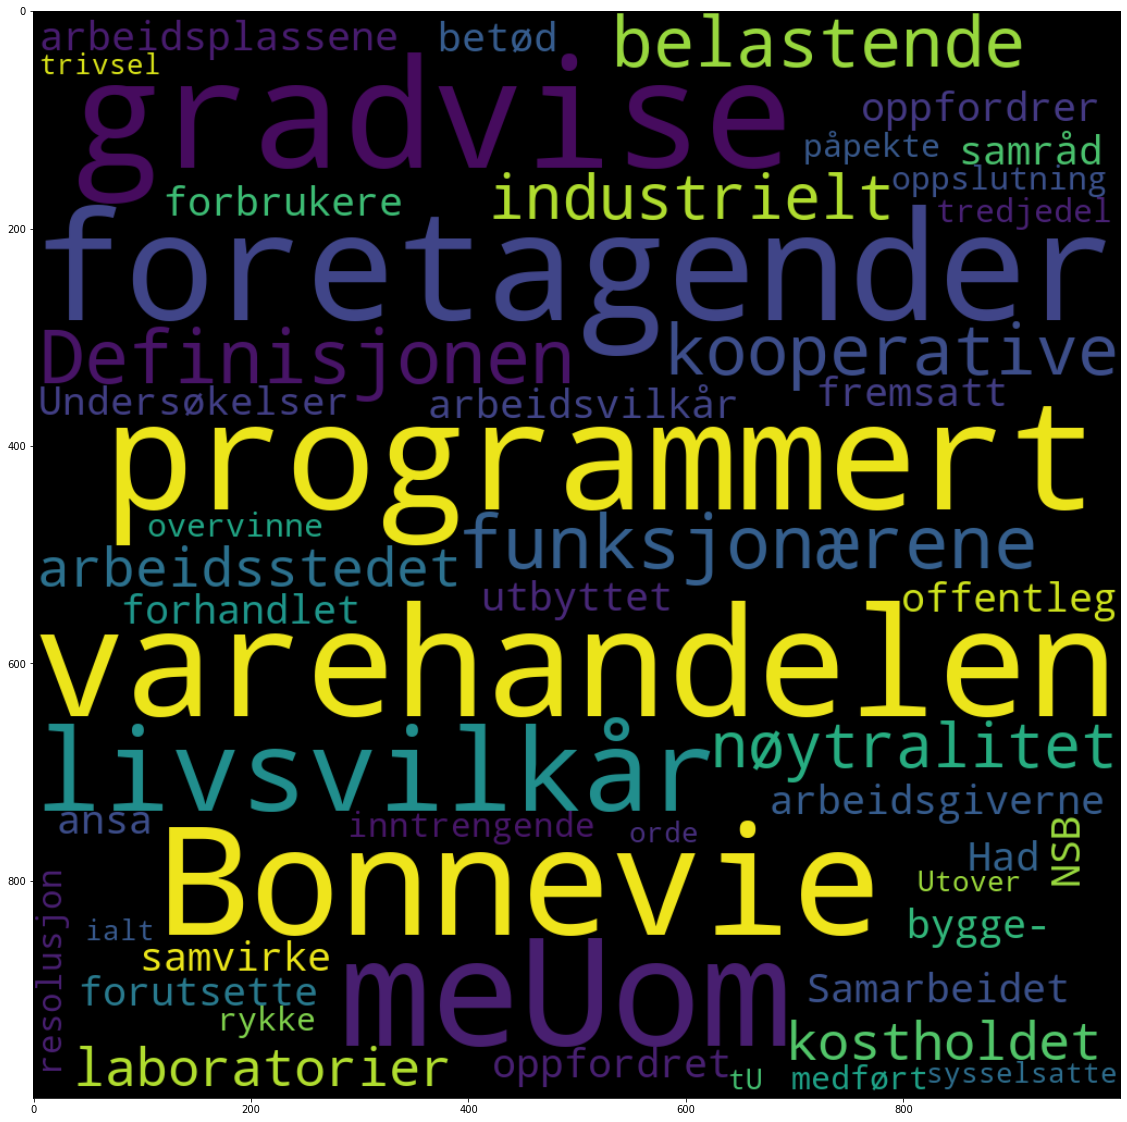

In [11]:
nb.cloud(nb.frame_sort(diff)[:50])